### Nhung Nguyen
### Final project
### EDA

### Data source

##### Rishabh Misra, Mengting Wan, Julian McAuley "Decomposing Fit Semantics for Product Size Recommendation in Metric Spaces". RecSys, 2018.
##### @inproceedings{misra2018decomposing,
##### title={Decomposing fit semantics for product size recommendation in metric spaces},
##### author={Misra, Rishabh and Wan, Mengting and McAuley, Julian},
##### booktitle={Proceedings of the 12th ACM Conference on Recommender Systems},
##### pages={422--426},
##### year={2018},
##### organization={ACM}
##### }
##### Convienient Link

##### https://rishabhmisra.github.io/publications/
##### https://www.kaggle.com/rmisra/clothing-fit-dataset-for-size-recommendation


### Load data

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [2]:
df = pd.read_json(r'renttherunway_final_data.json', lines=True)

In [3]:
df.head(1)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"


In [4]:
# rename the column name
df = df.rename(columns={'fit': 'fit_feedback'})

### Remove people whose age is more than 80
#### It is possible people entered age incorrect

In [5]:
df = df[df.age < 80]

In [6]:
# People who are much older probably want to borrow gowns 
df['age'].max()

78.0

### Remove NA  rows

In [7]:
print('Number of rows before removing rows with missing values:', str(df.shape[0]))

# Remove rows with np.NaN

df = df.dropna(how='any')

print('Number of rows after removing rows with missing values:', str(df.shape[0]))


Number of rows before removing rows with missing values: 191490
Number of rows after removing rows with missing values: 146311


### Total number of unique items 

In [8]:
print ('Total number of unique item id:')
print (len(df['item_id'].unique()))
print ('Total number of unique users:')
print (len(df['user_id'].unique()))
print ('Total number of reviews:')
print (df.shape[0])

Total number of unique item id:
5735
Total number of unique users:
77321
Total number of reviews:
146311


### Remove unused column 

In [9]:
columns = ['review_text', 'review_summary']
df.drop(columns, inplace=True, axis=1)

In [10]:
df.head(1)

,fit_feedback,user_id,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,"April 20, 2016"


### Convert height column to number

In [11]:
# define function
def clean_height(number): 
    string = str(number)
    # remove any other special character
    string = re.sub(r'[^0-9]+','' ,string)
    if len(string) >2:
        string = string[:-1]
    if string != '':
        string = int(string)
    
    return string

In [12]:
df['height_convert'] = df['height'].apply(clean_height)
# convert height to numeric
df['height_convert'] = pd.to_numeric(df['height_convert'])

In [13]:
df.head(1)

,fit_feedback,user_id,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date,height_convert
0,fit,420272,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,"April 20, 2016",58


In [14]:
# remove column height
df.drop(columns=['height'], inplace=True, axis=1)
df.head(1)

,fit_feedback,user_id,bust size,item_id,weight,rating,rented for,body type,category,size,age,review_date,height_convert
0,fit,420272,34d,2260466,137lbs,10.0,vacation,hourglass,romper,14,28.0,"April 20, 2016",58


### Convert weight column to number

In [15]:
# define function
def clean_weight(number): 
    string = str(number)
    # remove any other special character
    string = re.sub(r'[^0-9]+','' ,string)
    if string != '':
        string = int(string)
    return string

In [16]:
df['weight_convert'] = df['weight'].apply(clean_weight)
# convert height to numeric
df['weight_convert'] = pd.to_numeric(df['weight_convert'])

In [17]:
df.head(1)

,fit_feedback,user_id,bust size,item_id,weight,rating,rented for,body type,category,size,age,review_date,height_convert,weight_convert
0,fit,420272,34d,2260466,137lbs,10.0,vacation,hourglass,romper,14,28.0,"April 20, 2016",58,137


In [18]:
# remove weight column 
df.drop(columns=['weight'], inplace=True, axis=1)
df.head(1)

,fit_feedback,user_id,bust size,item_id,rating,rented for,body type,category,size,age,review_date,height_convert,weight_convert
0,fit,420272,34d,2260466,10.0,vacation,hourglass,romper,14,28.0,"April 20, 2016",58,137


In [19]:
df = df[df.weight_convert > 100]

### All posible categorical column 

In [20]:
df['fit_feedback'].unique()

array(['fit', 'small', 'large'], dtype=object)

In [21]:
df['body type'].unique()

array(['hourglass', 'straight & narrow', 'pear', 'athletic', 'full bust',
       'petite', 'apple'], dtype=object)

In [22]:
df['rented for'].unique()

array(['vacation', 'other', 'formal affair', 'wedding', 'date',
       'everyday', 'party', 'work', 'party: cocktail'], dtype=object)

In [23]:
df['rented for'][df['rented for']=='party: cocktail'] ='cocktail'

In [24]:
df = df[(df['category'] == 'dress') | (df['category'] == 'gown') | (df['category'] == 'sheath')|(df['category'] == 'shift')|
       (df['category'] == 'jumpsuit')|(df['category'] == 'top')|(df['category'] == 'maxi')|(df['category'] == 'skirt')|
       (df['category'] == 'romper')|(df['category'] == 'jacket')|(df['category'] == 'mini')]

In [25]:
df['category'].unique()

array(['romper', 'gown', 'dress', 'sheath', 'jacket', 'jumpsuit', 'shift',
       'top', 'mini', 'skirt', 'maxi'], dtype=object)

### Convert rating into category 

In [26]:
df['rating_convert'] = 0

In [27]:
df['rating_convert'][df['rating'] >= 8] = 'High'
df['rating_convert'][df['rating'] < 8] = 'Medium'
df['rating_convert'][df['rating'] <= 5] = 'Low'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

In [28]:
df.tail(1)

,fit_feedback,user_id,bust size,item_id,rating,rented for,body type,category,size,age,review_date,height_convert,weight_convert,rating_convert
192543,fit,123612,36b,127865,10.0,wedding,athletic,gown,16,30.0,"August 29, 2017",56,155,High


### Convert 'rented for' column into category 

In [29]:
new = pd.get_dummies(df['rented for'])
new.head(1)

,cocktail,date,everyday,formal affair,other,party,vacation,wedding,work
0,0,0,0,0,0,0,1,0,0


In [30]:
new_df = pd.concat([df, new], axis=1)
new_df.head(1)

,fit_feedback,user_id,bust size,item_id,rating,rented for,body type,category,size,age,...,rating_convert,cocktail,date,everyday,formal affair,other,party,vacation,wedding,work
0,fit,420272,34d,2260466,10.0,vacation,hourglass,romper,14,28.0,...,High,0,0,0,0,0,0,1,0,0


### Convert 'fit' column into category

In [31]:
new = pd.get_dummies(df['fit_feedback'])
new.head(1)

,fit,large,small
0,1,0,0


In [32]:
new_df = pd.concat([new_df, new], axis=1)
new_df.head(1)

,fit_feedback,user_id,bust size,item_id,rating,rented for,body type,category,size,age,...,everyday,formal affair,other,party,vacation,wedding,work,fit,large,small
0,fit,420272,34d,2260466,10.0,vacation,hourglass,romper,14,28.0,...,0,0,0,0,1,0,0,1,0,0


### Visualization

Text(0.5, 1.0, 'Distribution of Rating')

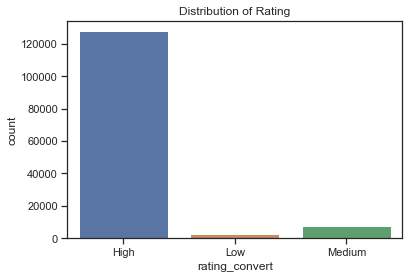

In [33]:
sns.countplot(x='rating_convert',data=df)
plt.title('Distribution of Rating')

Text(0.5, 1.0, 'Distribution of Height')

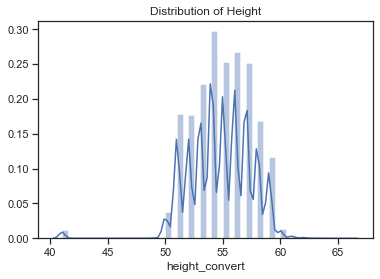

In [34]:
sns.distplot(new_df['height_convert'])
plt.title('Distribution of Height')

Text(0.5, 1.0, 'Distribution of Weight')

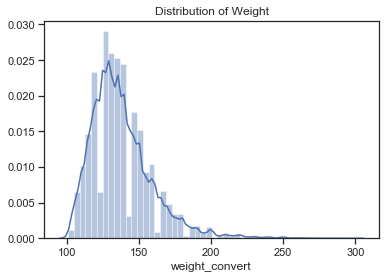

In [35]:
sns.distplot(new_df['weight_convert'])
plt.title('Distribution of Weight')

Text(0.5, 1.0, 'Distribution of Age')

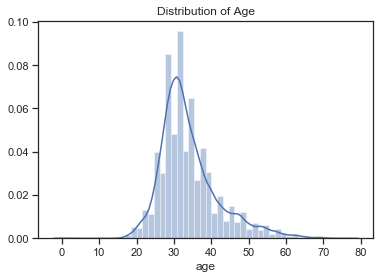

In [36]:
sns.distplot(new_df['age'])
plt.title('Distribution of Age')

Text(0.5, 1, 'Distribution of rating regarding fit_feedback')

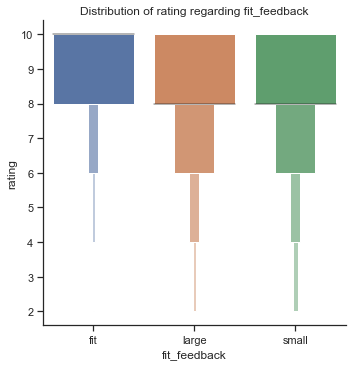

In [37]:
sns.catplot(x="fit_feedback", y="rating", kind="boxen",
            data=new_df.sort_values("fit_feedback"))
plt.title('Distribution of rating regarding fit_feedback')

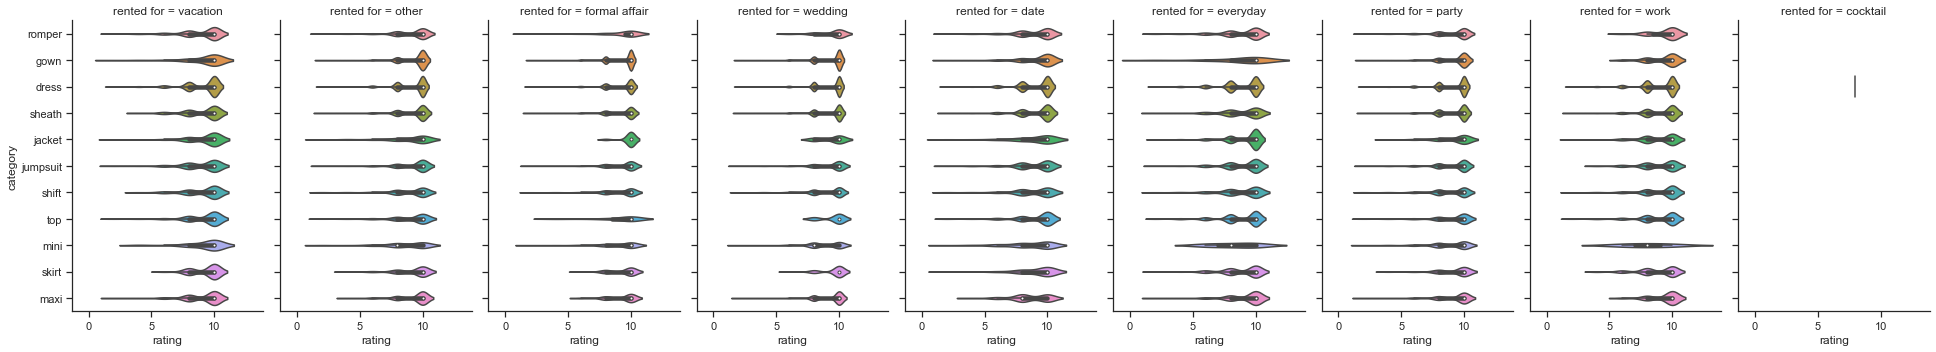

In [38]:
sns.catplot(x="rating", y="category", 
            col="rented for", aspect=.6, 
            kind="violin", data=df);

### Processing review date 

In [39]:
# Date can be processed in many ways: monthly, yearly, or just month category

In [40]:
from datetime import datetime

In [41]:
def convert_date(date_string):
    d = datetime.strptime(date_string, '%B %d, %Y')
    k = d.strftime('%Y-%m')
    return k

# Alternatively, I can convert date into years
#def convert_year(date_string):
#    d = datetime.strptime(date_string, '%B %d, %Y')
#    k = d.strftime('%Y')
#    return k

In [42]:
new_df['review_date'][0]

'April 20, 2016'

In [43]:
new_df['date'] = new_df['review_date'].apply(convert_date)

In [44]:
new_df['date'][0:5]

0    2016-04
1    2013-06
3    2014-02
4    2016-09
5    2016-04
Name: date, dtype: object

In [45]:
new_df['date'] = pd.to_datetime(new_df['date'])

### Create new dataframe to calculate mean rating for each month

In [46]:
month_df = new_df[['rating','date']]

In [47]:
month_df['Mean_rating'] = month_df.groupby(['date'])['rating'].transform('mean')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
month_df = month_df.drop(columns='rating')

In [49]:
month_df = month_df.drop_duplicates()

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Mean rating for each month')

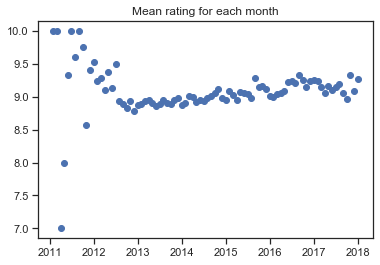

In [50]:
plt.plot_date(month_df['date'], month_df['Mean_rating'])
plt.title('Mean rating for each month')

In [51]:
num_rate = pd.DataFrame(new_df['date'].value_counts()).reset_index()

In [52]:
num_rate.columns = ['date','number_reviews']

In [54]:
num_rate[10:15]

,date,number_reviews
10,2016-05-01,3464
11,2016-08-01,3364
12,2016-04-01,3306
13,2016-10-01,3169
14,2017-03-01,3161
